In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from scipy.stats import zscore
from matplotlib.dates import MonthLocator, DateFormatter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Importiamo il nostro file "dataset_climatico"

In [4]:
try:
    data = pd.read_csv('dataset_climatico.csv')
except FileNotFoundError:
    print("File dataset_climatico.csv non trovato.")
    sys.exit()

Mostriamo le prime 10 righe del dataset

In [6]:
data.head(10)

,data_osservazione,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
0,2022-01-01,3.345032,16.712921,66.028263,75.580829,Stazione Napoli
1,2022-01-02,34.640506,9.669180,52.891332,22.567745,Stazione Roma
2,2022-01-03,1.223902,17.623765,82.054851,59.792104,Stazione Milano
3,2022-01-04,-5.234223,18.328380,48.785933,2.510954,Stazione Milano
4,2022-01-05,32.792867,5.431022,64.595705,83.449843,Stazione Milano
5,2022-01-06,0.503911,12.150907,55.594284,18.744475,Stazione Roma
6,2022-01-07,21.039572,10.531681,82.575716,0.476838,Stazione Roma
7,2022-01-08,-7.373964,10.758916,45.235000,30.118781,Stazione Milano
8,2022-01-09,22.881909,18.753262,34.728142,92.048712,Stazione Napoli
9,2022-01-10,29.677410,6.103774,74.919343,26.261422,Stazione Napoli


Verifichiamo che nel dataset non ci siano valori nan

In [8]:
data.isna().sum()

data_osservazione         0
temperatura_media         0
precipitazioni            0
umidita                   0
velocita_vento            0
stazione_meteorologica    0
dtype: int64

Applichiamo la normalizzazione Z-score a temperatura media, precipitazioni, umidità e velocità vento per standardizzarle.

In [10]:
t_media=data['temperatura_media'].mean()
t_sd = data['temperatura_media'].std()
data['temp_norm']=(data['temperatura_media']-t_media)/t_sd

umidita_media=data['umidita'].mean()
umidita_sd = data['umidita'].std()
data['umidita_norm']=(data['umidita']-umidita_media)/umidita_sd

velocita_vento_media=data['velocita_vento'].mean()
velocita_vento_sd = data['velocita_vento'].std()
data['velocita_vento_norm']=(data['velocita_vento']-velocita_vento_media)/velocita_vento_sd

precip_media=data['precipitazioni'].mean()
precip_sd = data['precipitazioni'].std()
data['precipitazioni_norm']=(data['precipitazioni']-precip_media)/precip_sd

Calcoliamo le statistiche descrittive (media, mediana, deviazione standard) per ogni variabile.

In [12]:
data.describe().T[['mean', '50%', 'std']]

,mean,50%,std
temperatura_media,1.261135e+01,12.102023,13.285324
precipitazioni,1.015689e+01,10.268888,5.848920
umidita,6.044085e+01,59.888175,17.247891
velocita_vento,4.761426e+01,46.657152,28.398370
temp_norm,-9.237056e-17,-0.038338,1.000000
umidita_norm,-2.842171e-17,-0.032043,1.000000
velocita_vento_norm,-6.661338e-17,-0.033703,1.000000
precipitazioni_norm,-3.019807e-17,0.019148,1.000000


Trasformiamo la colonna data_osservazione da str a datetime

In [14]:
data["data_osservazione"] = pd.to_datetime(data["data_osservazione"])


Realizziamo gli istogrammi per le variabili: temperatura media, precipitazioni, umidità e velocità del vento.

In [16]:
data.set_index("data_osservazione", inplace=True)

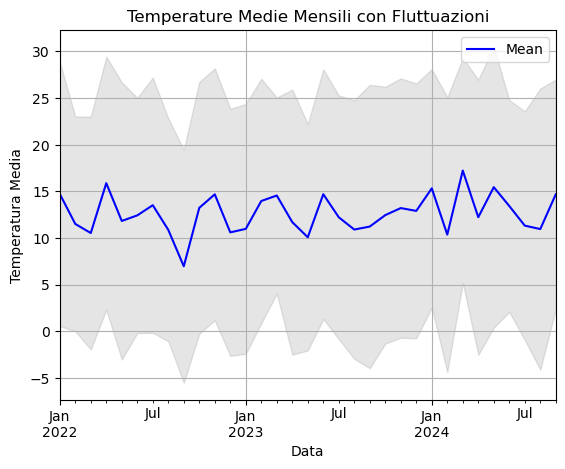

In [17]:
resampled_data = data["temperatura_media"].resample('ME').mean()
std_data = data["temperatura_media"].resample('ME').std()
resampled_data.plot(label='Mean', color='blue')
plt.fill_between(resampled_data.index, resampled_data - std_data, resampled_data + std_data, color='gray', alpha=0.2)
plt.title("Temperature Medie Mensili con Fluttuazioni")
plt.xlabel("Data")
plt.ylabel("Temperatura Media")
plt.legend()
plt.grid(True)
plt.show()


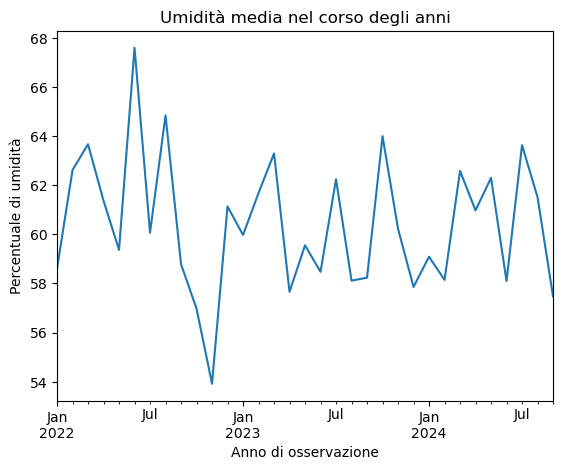

In [18]:
data.resample("M")["umidita"].mean().plot(kind="line") 
plt.title("Umidità media nel corso degli anni") 
plt.xlabel("Anno di osservazione") 
plt.ylabel("Percentuale di umidità") 
plt.show()

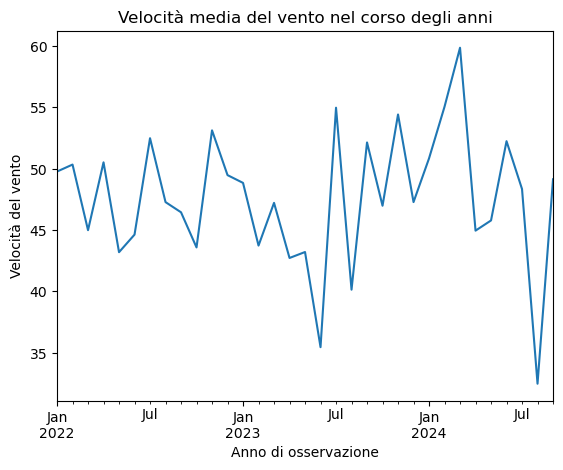

In [19]:
data.resample("M")["velocita_vento"].mean().plot(kind="line") 
plt.title("Velocità media del vento nel corso degli anni") 
plt.xlabel("Anno di osservazione") 
plt.ylabel("Velocità del vento") 
plt.show()

Realizziamo i boxplot per le variabili: temperatura media, precipitazioni, umidità e velocità del vento.

Text(0, 0.5, 'Temperatura')

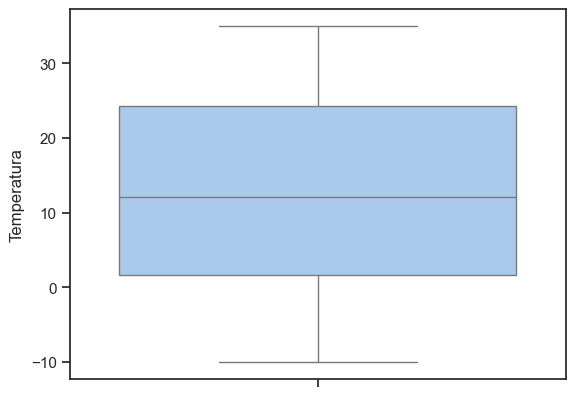

In [21]:
#boxplot temperatura
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='temperatura_media')
plt.ylabel('Temperatura')

Text(0, 0.5, 'Precipitazioni')

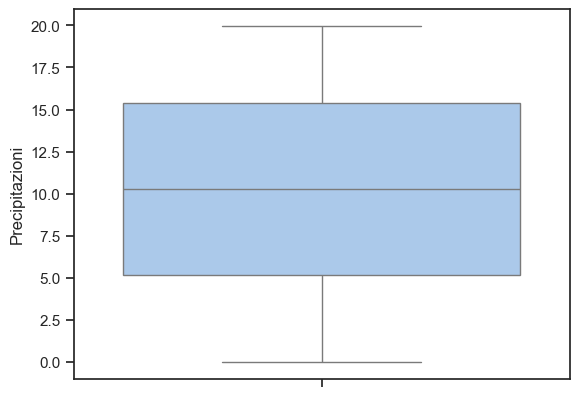

In [22]:
#boxplot precipitazioni
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='precipitazioni')
plt.ylabel('Precipitazioni')

Text(0, 0.5, 'Umidità')

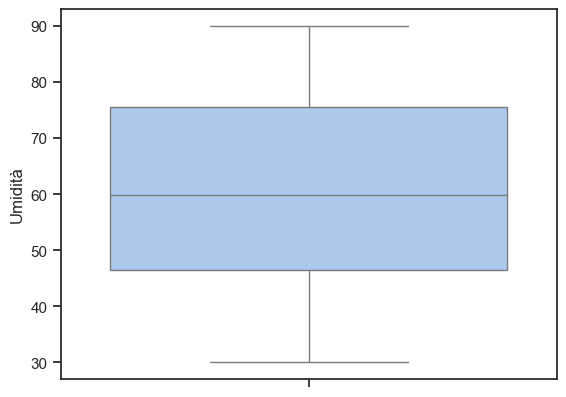

In [23]:
#boxplot umidità
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='umidita')
plt.ylabel('Umidità')

Text(0, 0.5, 'Velocità vento')

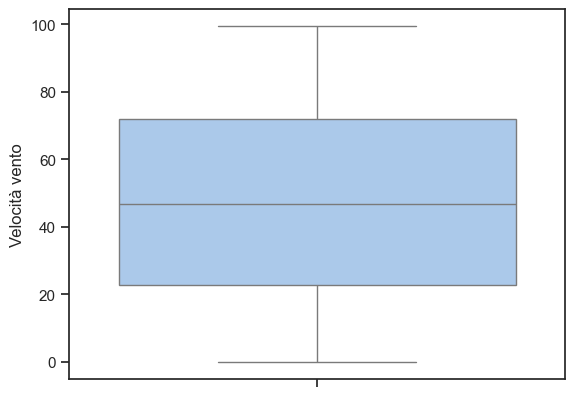

In [24]:
#boxplot velocità vento
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='velocita_vento')
plt.ylabel('Velocità vento')

### Analisi delle temperature registrate presso le diverse stazioni meteorologiche
Non sono state riscontrate molte differenze tra le quattro stazioni analizzate. La temperatura media più bassa è stata registrata a Torino.

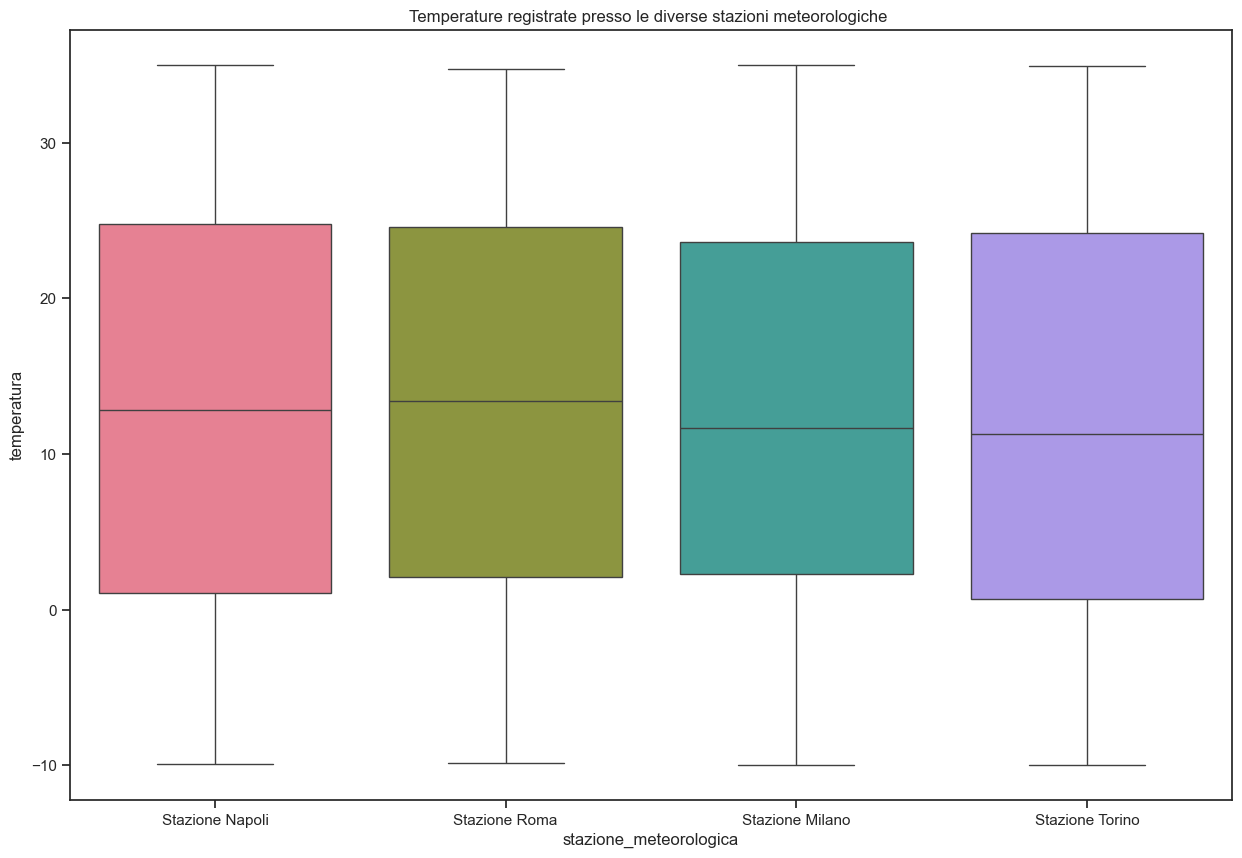

In [26]:
plt.figure(figsize=(15, 10))
sns.color_palette("husl")
sns.boxplot(data=data, y='temperatura_media', x='stazione_meteorologica', hue='stazione_meteorologica', palette='husl')
plt.title('Temperature registrate presso le diverse stazioni meteorologiche ')
plt.ylabel('temperatura')
plt.show()

### Analisi delle precipitazioni registrate presso le diverse stazioni meteorologiche
Non sono state riscontrate molte differenze tra le quattro stazioni analizzate. Tuttavia, è stata registrata una minore quantità di precipitazioni a Torino.

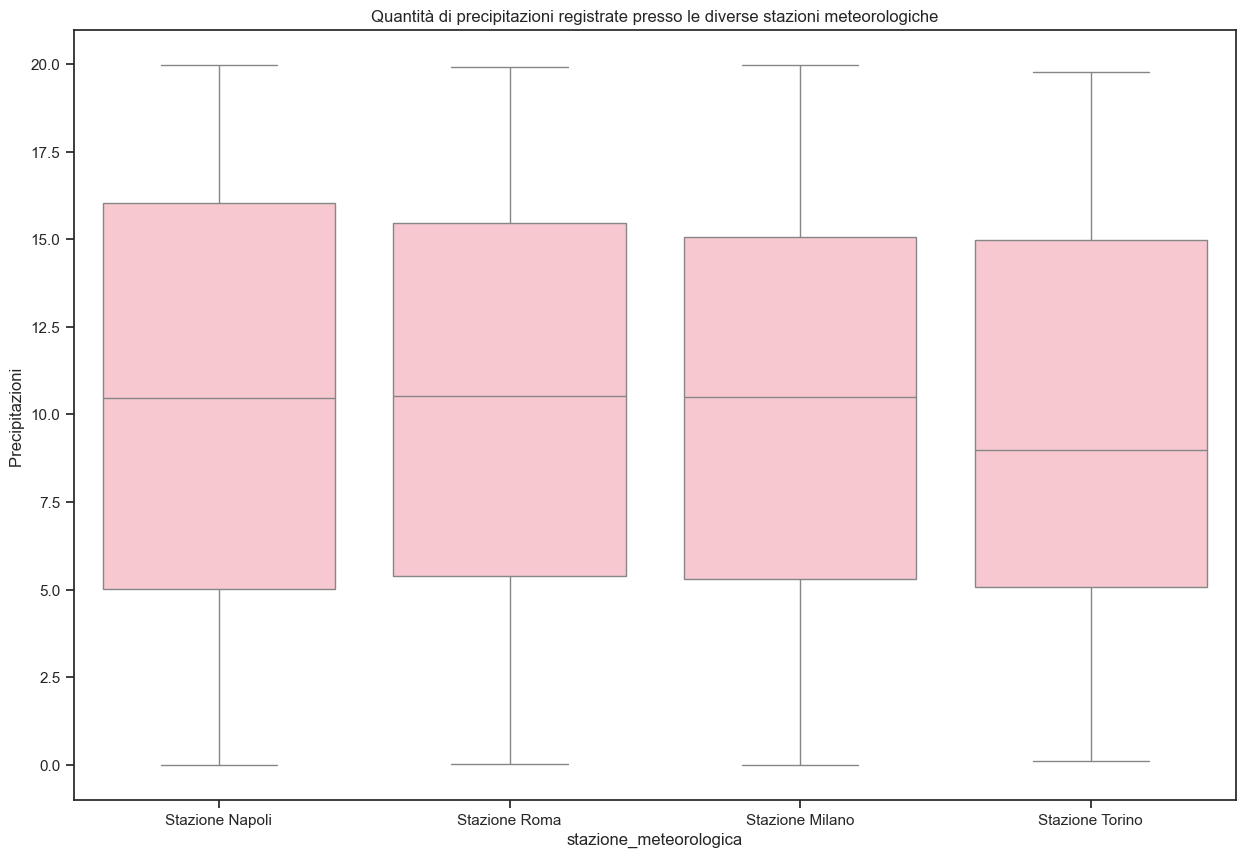

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, y = 'precipitazioni', x ='stazione_meteorologica', color='pink')
plt.title('Quantità di precipitazioni registrate presso le diverse stazioni meteorologiche')
plt.ylabel('Precipitazioni ')
plt.show()


# Analisi dei correlazioni
Utilizziamo una heatmap per visualizzare la correlazione tra le diverse variabili meteorologiche.

In [31]:
# heatmap
matrix = data[['temperatura_media', 'precipitazioni', 'umidita', 'velocita_vento']].corr()
matrix

,temperatura_media,precipitazioni,umidita,velocita_vento
temperatura_media,1.000000,-0.003993,-0.052520,-0.021765
precipitazioni,-0.003993,1.000000,0.026664,-0.001567
umidita,-0.052520,0.026664,1.000000,0.055076
velocita_vento,-0.021765,-0.001567,0.055076,1.000000


<Axes: >

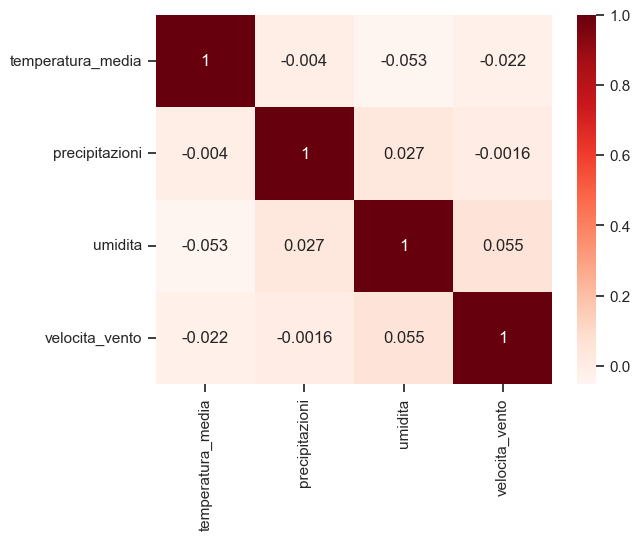

In [33]:
sns.heatmap(matrix, cmap="Reds", annot=True)

## Conclusioni
Da quello che si evince da quest'ultimo grafico non ci sono correlazioni significative tra nessuna delle variabili considerate. Come possiamo notare tutti i valori sono molto vicini allo 0, ciò denota un'indipendenza tra le variabili in esame. 